# Genetic Algorithm Solution

In [51]:
import csv  # to read csv file
import random
from random import randint, random
import numpy as np

In [52]:
# with is to keyword allows us to both open and close the file without having to explicitly close it.
with open('trip.csv', newline='') as csvfile:  # r for read only
    data = list(csv.reader(csvfile))
    # remove data form that place
    data.pop(0)

In [53]:
# we want to represent each chromosome as an array so we create all_activities array
all_activities = []
for i in data:
    all_activities.append({'Activity': i[0], 'type': i[1], 'cost': int(i[2])})


In [54]:
# population size
pop_size = 20

In [55]:
# we need to ask users for number of activities, so we can use the sumation as individual length
numAofActivities = []
# because it is 3 days
for i in range(3):
    while True:
        n = int(input(f"Please enter number of activities you prefer to do in Day{i+1} (1 or 2): "))
        if n <= 2:
            numAofActivities.append(n)
            break
        else:
            print("Please enter either 1 or 2.")

Please enter number of activities you prefer to do in Day1 (1 or 2): 1
Please enter number of activities you prefer to do in Day2 (1 or 2): 2
Please enter number of activities you prefer to do in Day3 (1 or 2): 1


In [56]:
# AcNo is the chromosome length
AcNo = sum(numAofActivities)

In [57]:
# Create the initial population, it is a set of individuals. Each individual is a solution to the problem you want to solve.
def initial_population(AcNo, all_activities):  # all_activities [0-35]
    pop = [randint(0,  len(all_activities) - 1) for _ in range(AcNo)]
    return pop

In [59]:
# Generate the population, our population will have a size of 20 and it is a set of chromosomes
population = [initial_population(AcNo, all_activities) for _ in range(pop_size)]  # list > list > list

# We need to ask the user about their budget
budget = int(input("Please enter your budget: "))

Please enter your budget: 200


In [60]:
# We also need to ask the user about the experience type they want
Experience = input("Please enter your activity preference (E for Exciting, S for Shopping & Restaurants, N for Nature): ")
while True:
    if Experience == 'E':
        ExperienceNew = 'Exciting'
    elif Experience == 'S':
        ExperienceNew = 'Shopping & Restaurants'
    elif Experience == 'N':
        ExperienceNew = 'Nature'
    else:
        print('Please choose between {E,S,N}')
    break

Please enter your activity preference (E for Exciting, S for Shopping & Restaurants, N for Nature): N


In [61]:
# Fitness function, we need it to give a fitness score to each individual.
# Before designing the fitness function, we need to assign a weight to each factor so we can choose the best individuals.
def Fitness_function(individual, all_activities, budget, Experience):
    # Assign the cost and type of each activity in the individual
    individual_cost = 0
    individual_type = ""
    for i in individual:
        individual_cost += all_activities[i]["cost"]
        individual_type += all_activities[i]["type"]

    # Calculate the fitness score based on the budget, experience type, and number of activities
    fitness = 0
    if individual_cost <= budget:
        fitness += 0.25
    if len(individual) == AcNo:
        fitness += 0.25
    if Experience in individual_type:
        fitness += 0.5

    return fitness

In [62]:
# Calculate the fitness of each individual in the population
fitness = [Fitness_function(individual, all_activities, budget, ExperienceNew)
           for individual in population]

In [63]:
# Selection, we need to select the best individuals to be the parents of the next generation.
# We will use the roulette wheel selection method.
def selection(population, fitness):
    # Calculate the probability of each individual
    total_fitness = sum(fitness)
    relative_fitness = [f / total_fitness for f in fitness]
    probabilities = [sum(relative_fitness[:i + 1])
                     for i in range(len(relative_fitness))]

    # Select the individuals based on the probabilities
    selected_individuals = []
    for _ in range(len(population)):
        r = random()
        for i in range(len(probabilities)):
            if r <= probabilities[i]:
                selected_individuals.append(population[i])
                break

    return selected_individuals


In [64]:
# Crossover, we need to combine the genes of the parents to create the offspring.
# We will use the one-point crossover method.
def crossover(parent1, parent2):
    # Choose a random index to perform the crossover
    crossover_index = randint(1, len(parent1) - 1)

    # Perform the crossover
    offspring1 = parent1[:crossover_index] + parent2[crossover_index:]
    offspring2 = parent2[:crossover_index] + parent1[crossover_index:]

    return offspring1, offspring2


In [65]:
# Mutation, we need to randomly change the genes of the offspring to avoid local optima.
# We will use the swap mutation method.
def mutation(offspring, all_activities):
    # Choose a random index to perform the mutation
    mutation_index = randint(0, len(offspring) - 1)

    # Perform the mutation
    offspring[mutation_index] = randint(0, len(all_activities) - 1)

    return offspring

In [66]:
# Create the next generation
def next_generation(population, fitness):
    # Select the best individuals
    selected_individuals = selection(population, fitness)

    # Perform crossover and mutation
    next_generation = []
    for i in range(0, len(selected_individuals), 2):
        # Perform crossover
        offspring1, offspring2 = crossover(
            selected_individuals[i], selected_individuals[i + 1])

        # Perform mutation
        offspring1 = mutation(offspring1, all_activities)
        offspring2 = mutation(offspring2, all_activities)

        # Add the offspring to the next generation
        next_generation.append(offspring1)
        next_generation.append(offspring2)

    return next_generation

In [67]:
# Run the genetic algorithm
for i in range(100):
    # Calculate the fitness of each individual in the population
    fitness = [Fitness_function(individual, all_activities, budget, ExperienceNew)
               for individual in population]

    # Check if we have found the solution
    if max(fitness) == 1:
        break

    # Create the next generation
    population = next_generation(population, fitness)

In [68]:
# Print the solution
best_individual = population[fitness.index(max(fitness))]
print("The best solution is: ", best_individual)
print("The fitness score is: ", max(fitness))

The best solution is:  [24, 11, 14, 30]
The fitness score is:  0.75


In [69]:
# Print the activities of the best individual
print("The activities are: ")
for i in best_individual:
    print(all_activities[i])

The activities are: 
{'Activity': 'Nofa Wild Life Park', 'type': 'Nature', 'cost': 100}
{'Activity': 'Centria Mall', 'type': 'Shopping & Resturants', 'cost': 900}
{'Activity': 'Al Nakheel Mall', 'type': 'Shopping & Resturants', 'cost': 450}
{'Activity': 'Theatre Shows', 'type': 'Exciting', 'cost': 800}


In [70]:
# Print the cost of the best individual
individual_cost = 0
for i in best_individual:
    individual_cost += all_activities[i]["cost"]
    print("The cost is: ", individual_cost)

The cost is:  100
The cost is:  1000
The cost is:  1450
The cost is:  2250


In [71]:
# Print the type of the best individual
individual_type = ""
for i in best_individual:
    individual_type += all_activities[i]["type"]
    print("The type is: ", individual_type)

The type is:  Nature
The type is:  NatureShopping & Resturants
The type is:  NatureShopping & ResturantsShopping & Resturants
The type is:  NatureShopping & ResturantsShopping & ResturantsExciting


In [72]:
# Print the number of activities of the best individual
print("The number of activities is: ", len(best_individual))

The number of activities is:  4


In [73]:
# Print the budget of the best individual
print("The budget is: ", budget)

The budget is:  200


In [74]:
# Print the experience type of the best individual
print("The experience type is: ", ExperienceNew)

The experience type is:  Nature


In [75]:
import matplotlib.pyplot as plt

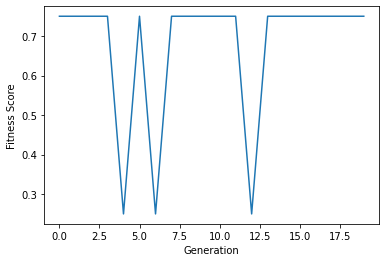

In [84]:
# apply the graph of best fitness score
import matplotlib.pyplot as plt

min_fitness = min(best_individual)
max_fitness = max(best_individual)
fitness_range = max_fitness - min_fitness
scaled_fitness = [(best_individual - min_fitness)/fitness_range*0.9 for best_individual in fitness]

plt.plot(fitness_range)
plt.ylabel('Fitness Score')
plt.xlabel('Generation')
plt.show()